AUTHOR: Leo A. Bianchi - 2021

$p = 1 - e^{(- 2 \beta J)}$

In [1]:
import numpy as np
import time as t
import pandas as pd
import sys
import os
import numpy.random as rnd
import scipy.constants as const
import multiprocessing as mp
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import Wolff as W

1.b)

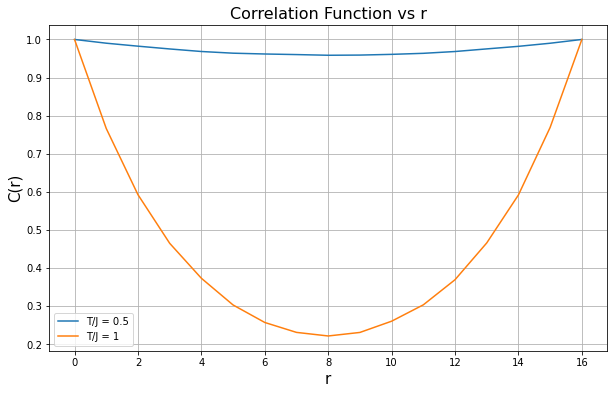

In [17]:
tab = pd.read_csv('Cs_05.txt', sep=' ', names= ['r', 'C', 'err'], index_col=False)
rs, Cs_05, errs_05 = np.array(tab['r']), np.array(tab['C']), np.array(tab['err'])
rs, Cs_05 = np.concatenate([rs, [16]]), np.concatenate([Cs_05, [Cs_05[0]]])

tab = pd.read_csv('Cs_1.txt', sep=' ', names= ['r', 'C', 'err'], index_col=False)
_, Cs_1, errs_1 = np.array(tab['r']), np.array(tab['C']), np.array(tab['err'])
Cs_1 = np.concatenate([Cs_1, [Cs_1[0]]])


plt.figure(figsize=(10,6))
plt.plot(rs, Cs_05, label = 'T/J = 0.5')
plt.plot(rs, Cs_1, label = 'T/J = 1')
plt.xlabel("r", size=15)
plt.ylabel("C(r)", size = 15)
plt.title("Correlation Function vs r", size = 16)
plt.grid()
plt.legend()
plt.savefig("Cvsr.pdf")

1.c) & 1.d)

$$\langle m^{2} \rangle =\frac{1}{L^{2}}\sum _{j=0}^{L-1}\sum _{k=0}^{L-1} \langle \sigma _{j} \sigma _{k} \rangle$$


In [3]:
tab = pd.read_csv('sim2D.txt', sep=' ', names= ['TovJ', 'm', 'err_m', 'm2', 'err_m2'], index_col=False)
TovJs, ms, err_ms, m2s, err_m2s = np.array(tab['TovJ']), np.array(tab['m']), np.array(tab['err_m']), np.array(tab['m2']), np.array(tab['err_m2'])

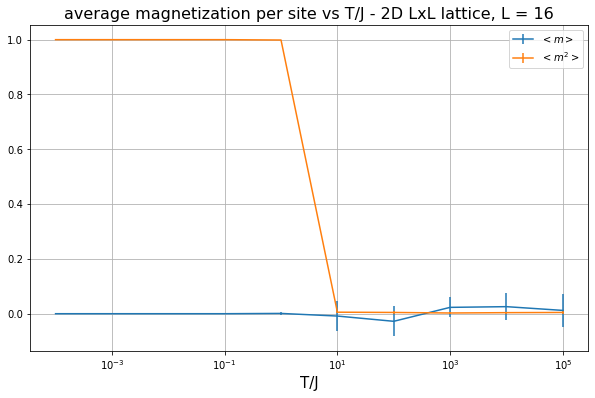

In [4]:
plt.figure(figsize=(10,6))
plt.errorbar(TovJs, ms, yerr=err_ms, label = '$<m>$')
plt.errorbar(TovJs, m2s, yerr=err_m2s, label = '$<m^2>$')
plt.xlabel("T/J", size=15)
plt.legend()
plt.grid()
plt.xscale('log')
plt.title("average magnetization per site vs T/J - 2D LxL lattice, L = 16", size = 16)
plt.savefig("mvsT_2D.pdf")

In [5]:
#returns x_intersec of the a(x) and b(x)
def find_intersection(x, a, b):
    x_new_s = np.linspace(min(x), max(x), 100000)
    poly_a, trans_a = fit_optimize(x, a)
    a_new_s = interpolate(poly_a, trans_a, x_new_s)
    poly_b, trans_b = fit_optimize(x, b)
    b_new_s = interpolate(poly_b, trans_b, x_new_s)
    delta = 1
    for i in range(len(a_new_s)):
        delta1 = abs(a_new_s[i] - b_new_s[i])
        if delta1 < delta:
            index = i
            delta = delta1
    print('Intersection found, x = %.7f'%x_new_s[index])
    return x_new_s[index] 

#Fit Polinomiale
def fit_poly(X, y, deg):
    #"trasforma" il vettore di dati inseriti in modo da poterlo usare come imput nel modello polinomiale
    transformer = PolynomialFeatures(degree=deg, include_bias=False)
    transformer.fit(X)
    x_ = transformer.transform(X)

    #Crea il modello e lo fitta
    Poly = LinearRegression().fit(x_, y)

    #Otteniamo i risultati
    r_sq = Poly.score(x_, y)
    intercept, coefficients = Poly.intercept_, Poly.coef_
    return Poly, transformer, r_sq


#Funzione che calcola automaticamente il grado che produce un fit polinomiale con lo score + alto e lo produce
def fit_optimize(x, y):
    #Dati
    X = np.array(x).reshape(-1,1)
    y = np.array(y)

    #while per ottimizzare il grado del polinomio usato
    deg = 2
    r_sq1 = 0
    Poly2, trans2, r_sq2 = fit_poly(X, y, deg) 
    while r_sq1 < r_sq2:
        deg +=1
        Poly1, trans1, r_sq1 = Poly2, trans2, r_sq2
        Poly2, trans2, r_sq2 = fit_poly(X, y, deg)
    print("Polinomio di grado " + str(deg)+"\n")
    return Poly1, trans1

#funzione che interpola il fit ottenuto facendo un resampling su un array xs
def interpolate (Poly, transformer, xs):
    ts = xs.reshape(-1,1) #Calcoliamo il punto di compressione in questo range di frequenze. 
    y_pred = Poly.predict(transformer.transform(ts))
    return y_pred

In [6]:
tab_g = pd.read_csv('sim2D_Gamma.txt', sep=' ', names= ['Gamma_8', 'Gamma_16', 'Gamma_32'], index_col=False)

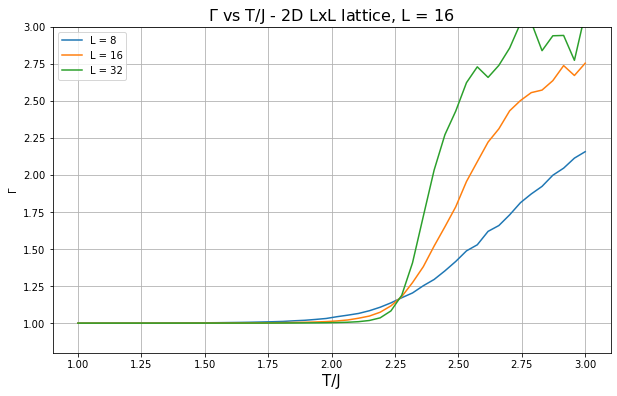

In [7]:
plt.figure(figsize=(10,6))
TovJs = np.linspace(1, 3, 48)
plt.plot(TovJs, tab_g['Gamma_8'], label='L = 8')
plt.plot(TovJs, tab_g['Gamma_16'], label='L = 16')
plt.plot(TovJs, tab_g['Gamma_32'], label='L = 32')
plt.xlabel("T/J", size=15)
plt.ylabel(r'$\Gamma$')
plt.legend()
plt.ylim(0.8, 3)
#plt.xlim(2, 2.5)
plt.grid()
plt.title(r'$\Gamma$'+ ' vs T/J - 2D LxL lattice, L = 16', size = 16)
plt.savefig("GammavsT.pdf")

In [8]:
tab_g_z = pd.read_csv('sim2D_Gamma_zoom.txt', sep=' ', names= ['Gamma_8', 'Gamma_16', 'Gamma_32'], index_col=False)

Polinomio di grado 7

Polinomio di grado 8

Polinomio di grado 9

Polinomio di grado 8

Polinomio di grado 7

Intersection found, x = 2.2623556
Polinomio di grado 9

Polinomio di grado 7

Intersection found, x = 2.2658453
Polinomio di grado 9

Polinomio di grado 8

Intersection found, x = 2.2676477


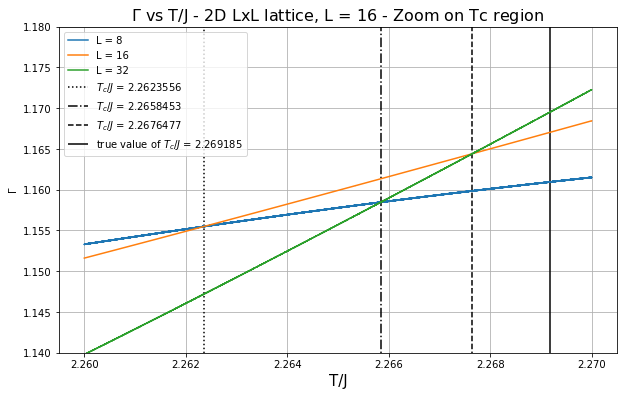

In [9]:
plt.figure(figsize=(10,6))
TovJs_z = np.linspace(2.24, 2.3, 48)
x_new_s = np.linspace(2.26, 2.27, 100000) #we zoom in a region close to Tc

poly_8, trans_8 = fit_optimize(TovJs_z, tab_g_z['Gamma_8'])
g8_new_s = interpolate(poly_8, trans_8, x_new_s)
plt.plot(x_new_s, g8_new_s, label='L = 8')

poly_16, trans_16 = fit_optimize(TovJs_z, tab_g_z['Gamma_16'])
g16_new_s = interpolate(poly_16, trans_16, x_new_s)
plt.plot(x_new_s, g16_new_s, label='L = 16')

poly_32, trans_32 = fit_optimize(TovJs_z, tab_g_z['Gamma_32'])
g32_new_s = interpolate(poly_32, trans_32, x_new_s)
plt.plot(x_new_s, g32_new_s, label='L = 32')


T_int8_16 = find_intersection(TovJs_z, np.array(tab_g_z['Gamma_16']), np.array(tab_g_z['Gamma_8']))
plt.vlines(T_int8_16, 1, 1.3, color='black', linestyles='dotted', label='$T_c/J$'+' = %.7f'%T_int8_16)

T_int8_32 = find_intersection(TovJs_z, np.array(tab_g_z['Gamma_32']), np.array(tab_g_z['Gamma_8']))
plt.vlines(T_int8_32, 1, 1.3, color='black', linestyles='dashdot', label='$T_c/J$'+' = %.7f'%T_int8_32)

T_int16_32 = find_intersection(TovJs_z, np.array(tab_g_z['Gamma_32']), np.array(tab_g_z['Gamma_16']))
plt.vlines(T_int16_32, 1, 1.3, color='black', linestyles='dashed', label='$T_c/J$'+' = %.7f'%T_int16_32)

plt.vlines(2.269185, 1, 1.3, color='black', linestyles='solid', label='true value of $T_c/J$'+' = 2.269185')
plt.xlabel("T/J", size=15)
plt.ylabel(r'$\Gamma$')
plt.legend()
plt.ylim(1.14,1.18)
plt.grid()
plt.title(r'$\Gamma$'+ ' vs T/J - 2D LxL lattice, L = 16 - Zoom on Tc region', size = 16)
plt.savefig("GammavsT_zoom.pdf")